In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.interpolate import griddata
%matplotlib inline



In [8]:
# return an array of random points(x,y) where x<=max_width and b<=max_height
def get_random_points(max_height,max_width,quantity):
    points = []
    while len(points)<quantity and len(points)<max_height*max_width:
        x_coord = random.randint(0,max_width-1)
        y_coord = random.randint(0,max_height-1)
        point = (x_coord,y_coord)
        if(point not in points):
            points.append((x_coord,y_coord))
    return points

# returns the irregular sampled image and the points used to evalute the value of the image    
def get_irregular_sampling(image,number_of_points):
    height , width = image.shape
    irregular_sampled_image = np.zeros(shape=(height,width))
    image_values=[]
    random_points = get_random_points(height,width,number_of_points)
    
    for i in range(number_of_points):
        x,y = random_points[i]
        irregular_sampled_image[y][x]=image[y][x]
        image_values.append(image[y][x])
    return irregular_sampled_image,random_points,image_values

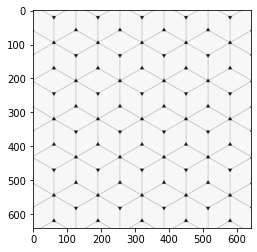

In [9]:
image = cv2.imread('sq.png',flags=cv2.IMREAD_GRAYSCALE)
H,W = image.shape
plt.imshow(image,cmap='gray')

In [10]:
i_sampled_image,i_points,i_values = get_irregular_sampling(image,1000)

In [11]:
x = np.arange(0, W, 1)
y = np.arange(0, H, 1)
xx, yy = np.meshgrid(x, y, sparse=True)

In [12]:
g_interpolation=griddata(i_points,np.array(i_values),(xx,yy), method='linear')

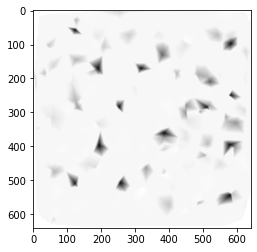

In [13]:
plt.imshow(g_interpolation,cmap='gray')

In [14]:
g_interpolation = np.nan_to_num(g_interpolation) # sometimes interpolation gives NAN

print(g_interpolation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
